# Heart Disease Analysis With Spark

See tutorial at:
https://towardsdatascience.com/machine-learning-with-pyspark-and-mllib-solving-a-binary-classification-problem-96396065d2aa

### Setup instruction: 
* Open Anaconda Prompt (Windows) or open terminal (Linux)
* Run the following command : **conda install -c conda-forge pyspark**

## Exploring The Data

In [54]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('ml-bank').getOrCreate()
df = spark.read.csv('./data/HeartDisease.csv', header = True, inferSchema = True)
df = df.select('Age', 'Sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang' , 'oldpeak', 'num', 'Place')
df = df.dropna() # dropping the null values
df.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Sex: integer (nullable = true)
 |-- cp: integer (nullable = true)
 |-- trestbps: integer (nullable = true)
 |-- chol: integer (nullable = true)
 |-- fbs: integer (nullable = true)
 |-- restecg: integer (nullable = true)
 |-- thalach: integer (nullable = true)
 |-- exang: integer (nullable = true)
 |-- oldpeak: double (nullable = true)
 |-- num: integer (nullable = true)
 |-- Place: string (nullable = true)



In [55]:
import pandas as pd
pd.DataFrame(df.take(5), columns=df.columns)

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Place
0,28,1,2,130,132,0,2,185,0,0.0,0,Hungary
1,29,1,2,120,243,0,0,160,0,0.0,0,Hungary
2,30,0,1,170,237,0,1,170,0,0.0,0,Hungary
3,31,0,2,100,219,0,1,150,0,0.0,0,Hungary
4,32,0,2,105,198,0,0,165,0,0.0,0,Hungary


### Summary statistics for numeric variables

In [57]:
numeric_features = [t[0] for t in df.dtypes if t[1] == 'int']
df.select(numeric_features).describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
Age,342,49.961988304093566,8.976428214146962,28,75
Sex,342,0.7777777777777778,0.41634885239994834,0,1
cp,342,3.1578947368421053,0.9402590337086648,1,4
trestbps,342,132.37134502923976,18.18895923543425,92,200
chol,342,223.82456140350877,94.57677719714117,0,603
fbs,342,0.12573099415204678,0.33203172326383845,0,1
restecg,342,0.32748538011695905,0.5713636449247045,0,2
thalach,342,134.87426900584796,24.478585624095185,69,190
exang,342,0.3713450292397661,0.48387239685840183,0,1


In [58]:
df.describe().toPandas()

,summary,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Place
0,count,342,342,342,342,342,342,342,342,342,342,342,342
1,mean,49.961988304093566,0.7777777777777778,3.1578947368421053,132.37134502923976,223.82456140350877,0.12573099415204678,0.32748538011695905,134.87426900584796,0.3713450292397661,0.6532163742690059,0.43567251461988304,None
2,stddev,8.976428214146962,0.41634885239994834,0.9402590337086648,18.18895923543425,94.57677719714117,0.33203172326383845,0.5713636449247045,24.478585624095185,0.48387239685840183,0.9219885782275852,0.49657122095708267,None
3,min,28,0,1,92,0,0,0,69,0,-0.5,0,Hungary
4,max,75,1,4,200,603,1,2,190,1,5.0,1,VA


In [59]:
df.toPandas().head()

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Place
0,28,1,2,130,132,0,2,185,0,0.0,0,Hungary
1,29,1,2,120,243,0,0,160,0,0.0,0,Hungary
2,30,0,1,170,237,0,1,170,0,0.0,0,Hungary
3,31,0,2,100,219,0,1,150,0,0.0,0,Hungary
4,32,0,2,105,198,0,0,165,0,0.0,0,Hungary


In [60]:
print(numeric_features)

['Age', 'Sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'num']


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feee9a8b828>]], dtype=object)

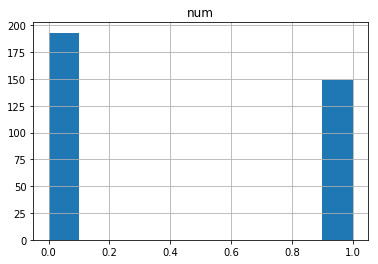

In [61]:
df.select('num').toPandas().sort_values(by='num').hist()

### Correlations between independent variables

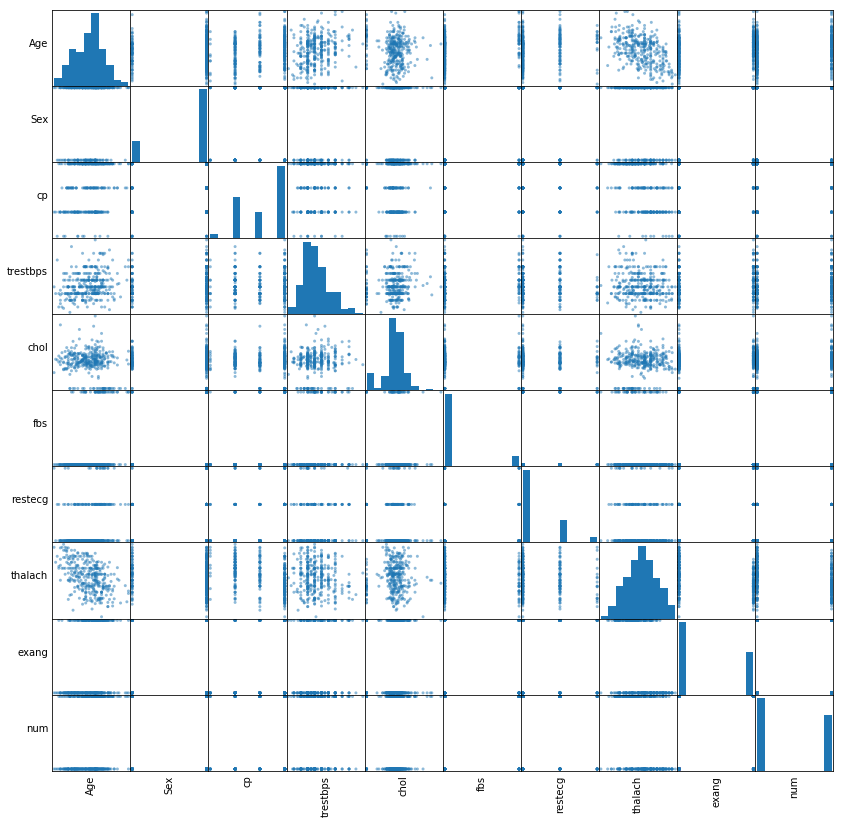

In [62]:
%matplotlib inline  
numeric_data = df.select(numeric_features).toPandas()
#print(numeric_data)
axs = pd.plotting.scatter_matrix(numeric_data, figsize=(14, 14));
n = len(numeric_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [44]:
#df = df.select('Age', 'Sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang' ,'num')
cols = df.columns
df.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Sex: integer (nullable = true)
 |-- cp: integer (nullable = true)
 |-- trestbps: integer (nullable = true)
 |-- chol: integer (nullable = true)
 |-- fbs: integer (nullable = true)
 |-- restecg: integer (nullable = true)
 |-- thalach: integer (nullable = true)
 |-- exang: integer (nullable = true)
 |-- oldpeak: double (nullable = true)
 |-- num: integer (nullable = true)
 |-- Place: string (nullable = true)



## Preparing Data for Machine Learning

The process includes Category Indexing, One-Hot Encoding and VectorAssembler — a feature transformer that merges multiple columns into a vector column.

In [63]:
from pyspark.ml.feature import OneHotEncoderEstimator, StringIndexer, VectorAssembler

categoricalColumns = ['Place']
stages = []
for categoricalCol in categoricalColumns:
    stringIndexer = StringIndexer(inputCol = categoricalCol, outputCol = categoricalCol + 'Index')
    encoder = OneHotEncoderEstimator(inputCols=[stringIndexer.getOutputCol()], outputCols=[categoricalCol + "classVec"])
    stages += [stringIndexer, encoder]
    
label_stringIdx = StringIndexer(inputCol = 'num', outputCol = 'label')
stages += [label_stringIdx]

numericCols = ['Age', 'Sex', 'cp', 'trestbps', 'chol', 'restecg', 'thalach','oldpeak','exang','fbs']
assemblerInputs = [c + "classVec" for c in categoricalColumns] + numericCols
assembler = VectorAssembler(inputCols=assemblerInputs, outputCol="features")
stages += [assembler]

The above code indexes each categorical column using the StringIndexer, then converts the indexed categories into one-hot encoded variables. The resulting output has the binary vectors appended to the end of each row. We use the StringIndexer again to encode our labels to label indices. Next, we use the VectorAssembler to combine all the feature columns into a single vector column.


### Pipeline

We use Pipeline to chain multiple Transformers and Estimators together to specify our machine learning workflow. A Pipeline’s stages are specified as an ordered array.

In [64]:
from pyspark.ml import Pipeline
pipeline = Pipeline(stages = stages)
pipelineModel = pipeline.fit(df)
df = pipelineModel.transform(df)
df.printSchema()

root
 |-- Age: integer (nullable = true)
 |-- Sex: integer (nullable = true)
 |-- cp: integer (nullable = true)
 |-- trestbps: integer (nullable = true)
 |-- chol: integer (nullable = true)
 |-- fbs: integer (nullable = true)
 |-- restecg: integer (nullable = true)
 |-- thalach: integer (nullable = true)
 |-- exang: integer (nullable = true)
 |-- oldpeak: double (nullable = true)
 |-- num: integer (nullable = true)
 |-- Place: string (nullable = true)
 |-- PlaceIndex: double (nullable = false)
 |-- PlaceclassVec: vector (nullable = true)
 |-- label: double (nullable = false)
 |-- features: vector (nullable = true)



In [65]:
pd.DataFrame(df.take(5), columns=df.columns).transpose()

,0,1,2,3,4
Age,28,29,30,31,32
Sex,1,1,0,0,0
cp,2,2,1,2,2
trestbps,130,120,170,100,105
chol,132,243,237,219,198
fbs,0,0,0,0,0
restecg,2,0,1,1,0
thalach,185,160,170,150,165
exang,0,0,0,0,0
oldpeak,0,0,0,0,0


Randomly split data into train and test sets, and set seed for reproducibility.

In [66]:
train, test = df.randomSplit([0.7, 0.3], seed = 2018)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 246
Test Dataset Count: 96


## Logistic Regression Model

In [67]:
from pyspark.ml.classification import LogisticRegression
lr = LogisticRegression(featuresCol = 'features', labelCol = 'label', maxIter=5000)
lrModel = lr.fit(train)

Summarize the model over the training set, we can also obtain the receiver-operating characteristic and areaUnderROC.

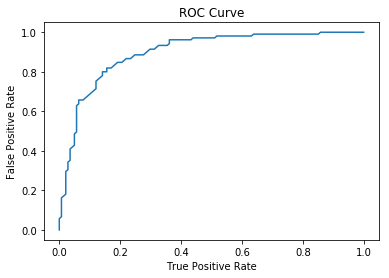

Training set areaUnderROC: 0.8981087470449169


In [68]:
trainingSummary = lrModel.summary
roc = trainingSummary.roc.toPandas()
plt.plot(roc['FPR'],roc['TPR'])
plt.ylabel('False Positive Rate')
plt.xlabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()
print('Training set areaUnderROC: ' + str(trainingSummary.areaUnderROC))

## Make predictions on the test set

In [69]:
predictions = lrModel.transform(test)
predictions.select('Age', 'Sex', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+---+---+-----+--------------------+----------+--------------------+
|Age|Sex|label|       rawPrediction|prediction|         probability|
+---+---+-----+--------------------+----------+--------------------+
| 31|  0|  0.0|[3.67084407293804...|       0.0|[0.97517689645979...|
| 31|  1|  1.0|[-1.3865072928151...|       1.0|[0.19996593310505...|
| 34|  1|  1.0|[3.70097494496196...|       0.0|[0.97589592292516...|
| 35|  1|  0.0|[2.56695693083384...|       0.0|[0.92870446943663...|
| 36|  1|  0.0|[0.29840853512492...|       0.0|[0.57405342398044...|
| 37|  0|  0.0|[2.86817482319857...|       0.0|[0.94625059433008...|
| 37|  1|  0.0|[1.33190084973171...|       0.0|[0.79115488379491...|
| 38|  1|  0.0|[2.25126946013840...|       0.0|[0.90475997988784...|
| 38|  1|  0.0|[1.66647124736407...|       0.0|[0.84110477955300...|
| 38|  1|  1.0|[-1.9543259508651...|       1.0|[0.12408242289785...|
+---+---+-----+--------------------+----------+--------------------+
only showing top 10 rows



In [52]:
predictions.toPandas().head()

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Place,PlaceIndex,PlaceclassVec,label,features,rawPrediction,probability,prediction
0,31,0,2,100,219,0,1,150,0,0.0,0,Hungary,0.0,"(1.0, 0.0)",0.0,"[1.0, 0.0, 31.0, 0.0, 2.0, 100.0, 219.0, 1.0, ...","[3.67084407294, -3.67084407294]","[0.97517689646, 0.0248231035402]",0.0
1,31,1,4,120,270,0,0,153,1,1.5,1,Hungary,0.0,"(1.0, 0.0)",1.0,"[1.0, 0.0, 31.0, 1.0, 4.0, 120.0, 270.0, 0.0, ...","[-1.38650729282, 1.38650729282]","[0.199965933105, 0.800034066895]",1.0
2,34,1,1,140,156,0,0,180,0,0.0,1,Hungary,0.0,"(1.0, 0.0)",1.0,"[1.0, 0.0, 34.0, 1.0, 1.0, 140.0, 156.0, 0.0, ...","[3.70097494496, -3.70097494496]","[0.975895922925, 0.0241040770748]",0.0
3,35,1,2,150,264,0,0,168,0,0.0,0,Hungary,0.0,"(1.0, 0.0)",0.0,"[1.0, 0.0, 35.0, 1.0, 2.0, 150.0, 264.0, 0.0, ...","[2.56695693083, -2.56695693083]","[0.928704469437, 0.0712955305634]",0.0
4,36,1,3,112,340,0,0,184,0,1.0,0,Hungary,0.0,"(1.0, 0.0)",0.0,"[1.0, 0.0, 36.0, 1.0, 3.0, 112.0, 340.0, 0.0, ...","[0.298408535125, -0.298408535125]","[0.57405342398, 0.42594657602]",0.0


In [70]:
predictions.toPandas().tail()

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,Place,PlaceIndex,PlaceclassVec,label,features,rawPrediction,probability,prediction
91,66,1,3,110,213,1,2,99,1,1.3,0,VA,1.0,"(0.0, 1.0)",0.0,"[0.0, 1.0, 66.0, 1.0, 3.0, 110.0, 213.0, 2.0, ...","[-3.06354238335, 3.06354238335]","[0.0446363977824, 0.955363602218]",1.0
92,66,1,3,120,0,0,1,120,0,-0.5,0,VA,1.0,"(0.0, 1.0)",0.0,"[0.0, 1.0, 66.0, 1.0, 3.0, 120.0, 0.0, 1.0, 12...","[2.77231747733, -2.77231747733]","[0.941161451772, 0.058838548228]",0.0
93,66,1,4,112,261,0,0,140,0,1.5,1,VA,1.0,"(0.0, 1.0)",1.0,"[0.0, 1.0, 66.0, 1.0, 4.0, 112.0, 261.0, 0.0, ...","[-1.57611565386, 1.57611565386]","[0.171346303825, 0.828653696175]",1.0
94,68,1,3,134,254,1,0,151,1,0.0,0,VA,1.0,"(0.0, 1.0)",0.0,"[0.0, 1.0, 68.0, 1.0, 3.0, 134.0, 254.0, 0.0, ...","[-2.3548003513, 2.3548003513]","[0.0866849705311, 0.913315029469]",1.0
95,75,1,4,160,310,1,0,112,1,2.0,0,VA,1.0,"(0.0, 1.0)",0.0,"[0.0, 1.0, 75.0, 1.0, 4.0, 160.0, 310.0, 0.0, ...","[-5.30929635038, 5.30929635038]","[0.00492106864717, 0.995078931353]",1.0


### Evaluate the logistic regression model

In [71]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator
evaluator = BinaryClassificationEvaluator()
print('Test Area Under ROC', evaluator.evaluate(predictions))

Test Area Under ROC 0.8190559440559446


## Decision Tree Classifier

Decision trees are widely used since they are easy to interpret, handle categorical features, extend to the multi-class classification, do not require feature scaling, and are able to capture non-linearities and feature interactions.

In [72]:
from pyspark.ml.classification import DecisionTreeClassifier
dt = DecisionTreeClassifier(featuresCol = 'features', labelCol = 'label', maxDepth = 3)
dtModel = dt.fit(train)
predictions = dtModel.transform(test)
predictions.select('Age', 'Sex', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+---+---+-----+-------------+----------+--------------------+
|Age|Sex|label|rawPrediction|prediction|         probability|
+---+---+-----+-------------+----------+--------------------+
| 31|  0|  0.0| [115.0,26.0]|       0.0|[0.81560283687943...|
| 31|  1|  1.0|    [3.0,0.0]|       0.0|           [1.0,0.0]|
| 34|  1|  1.0| [115.0,26.0]|       0.0|[0.81560283687943...|
| 35|  1|  0.0| [115.0,26.0]|       0.0|[0.81560283687943...|
| 36|  1|  0.0| [115.0,26.0]|       0.0|[0.81560283687943...|
| 37|  0|  0.0| [115.0,26.0]|       0.0|[0.81560283687943...|
| 37|  1|  0.0| [115.0,26.0]|       0.0|[0.81560283687943...|
| 38|  1|  0.0| [115.0,26.0]|       0.0|[0.81560283687943...|
| 38|  1|  0.0| [115.0,26.0]|       0.0|[0.81560283687943...|
| 38|  1|  1.0|  [18.0,66.0]|       1.0|[0.21428571428571...|
+---+---+-----+-------------+----------+--------------------+
only showing top 10 rows



### Evaluate the decision tree model

In [73]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.7194055944055945


One simple decision tree performed poorly because it is too weak given the range of different features. The prediction accuracy of decision trees can be improved by Ensemble methods, such as Random Forest and Gradient-Boosted Tree.

## Random Forest Classifier

In [74]:
from pyspark.ml.classification import RandomForestClassifier
rf = RandomForestClassifier(featuresCol = 'features', labelCol = 'label').setNumTrees(100)
rfModel = rf.fit(train)
predictions = rfModel.transform(test)
predictions.select('Age', 'Sex', 'label', 'rawPrediction', 'prediction', 'probability').show(10)

+---+---+-----+--------------------+----------+--------------------+
|Age|Sex|label|       rawPrediction|prediction|         probability|
+---+---+-----+--------------------+----------+--------------------+
| 31|  0|  0.0|[89.6474237020989...|       0.0|[0.89647423702098...|
| 31|  1|  1.0|[33.3021469005696...|       1.0|[0.33302146900569...|
| 34|  1|  1.0|[90.7985928070201...|       0.0|[0.90798592807020...|
| 35|  1|  0.0|[88.6610159750263...|       0.0|[0.88661015975026...|
| 36|  1|  0.0|[61.4307386807634...|       0.0|[0.61430738680763...|
| 37|  0|  0.0|[76.7818643711703...|       0.0|[0.76781864371170...|
| 37|  1|  0.0|[77.9095063845919...|       0.0|[0.77909506384591...|
| 38|  1|  0.0|[88.3424560394638...|       0.0|[0.88342456039463...|
| 38|  1|  0.0|[81.3334158349070...|       0.0|[0.81333415834907...|
| 38|  1|  1.0|[27.1240601360662...|       1.0|[0.27124060136066...|
+---+---+-----+--------------------+----------+--------------------+
only showing top 10 rows



### Evaluate the random forest classifier

In [75]:
evaluator = BinaryClassificationEvaluator()
print("Test Area Under ROC: " + str(evaluator.evaluate(predictions, {evaluator.metricName: "areaUnderROC"})))

Test Area Under ROC: 0.8194930069930072
